# 导入第三方库及从第三方库中导入函数
代码后面部分可以根据需要用到的部分单独执行，但这一部分要提前运行，相当于构建环境变量

In [1]:
import obspy
import numpy as np
import matplotlib.pyplot as plt
from obspy.core import read

# 将mssed文件转换为SAC文件
只需改变代码中mseed文件名即可完成不同mseed文件的转换

In [2]:
st = read("PLBC.CN.mseed")
for tr in st:
    fname = "%s.%s.%s.%s.SAC" % (tr.stats.network, tr.stats.station, tr.stats.location, tr.stats.channel)
    tr.write(fname, format="SAC")
#该文件只有一个通道，故只转换为一个SAC文件

# 读取及显示SAC文件基本信息
只需改变read后的文件名即可读取不同的SAC文件。
这一板块建议运行，因为之后文件代码的变量都是在这一板块的基础上的。

In [3]:
st1 = read("CN.PLBC..HHZ.SAC")

In [4]:
#显示台站通道的基本信息，台站通道名，开始结束时间，频率样本数
print(st1)

1 Trace(s) in Stream:
CN.PLBC..HHZ | 2012-06-11T22:21:00.000000Z - 2012-06-11T22:30:00.000000Z | 100.0 Hz, 54001 samples


In [5]:
len(st1)

1

In [6]:
#将文件信息赋值给tr
tr1 = st1[0]

In [7]:
print(tr1)

CN.PLBC..HHZ | 2012-06-11T22:21:00.000000Z - 2012-06-11T22:30:00.000000Z | 100.0 Hz, 54001 samples


In [8]:
print(tr1.stats)

         network: CN
         station: PLBC
        location: 
         channel: HHZ
       starttime: 2012-06-11T22:21:00.000000Z
         endtime: 2012-06-11T22:30:00.000000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 54001
           calib: 1.0
         _format: SAC
             sac: AttribDict({'delta': 0.0099999998, 'depmin': -104389.0, 'depmax': 81108.0, 'scale': 1.0, 'b': 0.0, 'e': 540.0, 'depmen': -5609.8057, 'nzyear': 2012, 'nzjday': 163, 'nzhour': 22, 'nzmin': 21, 'nzsec': 0, 'nzmsec': 0, 'nvhdr': 6, 'npts': 54001, 'iftype': 1, 'iztype': 9, 'leven': 1, 'lpspol': 1, 'lovrok': 1, 'lcalda': 0, 'kstnm': 'PLBC', 'kcmpnm': 'HHZ', 'knetwk': 'CN'})


In [9]:
tr1.stats.station

'PLBC'

In [10]:
# 显示通道1数据
tr1.data

array([-5892., -6118., -5781., ..., -6238., -5636., -6083.], dtype=float32)

In [11]:
# 显示通道1的前100组数据
tr1.data[0:100]

array([-5892., -6118., -5781., -6382., -5502., -6086., -6636., -4719.,
       -6646., -6056., -5638., -5887., -5960., -5813., -5808., -6304.,
       -5470., -6125., -6030., -5606., -6177., -4998., -6398., -6001.,
       -4793., -6747., -5559., -5660., -6352., -5237., -5515., -6442.,
       -5364., -5571., -5877., -6108., -5776., -5850., -5379., -5910.,
       -6498., -5075., -6465., -5642., -5514., -6143., -6045., -4991.,
       -6282., -5887., -5448., -5817., -5819., -6083., -5277., -6351.,
       -5397., -5797., -5971., -5501., -5434., -6408., -5688., -5287.,
       -5871., -6437., -4878., -5786., -6246., -4862., -6568., -4541.,
       -6485., -5330., -5189., -6691., -4926., -5330., -5923., -6150.,
       -4747., -5809., -5702., -5349., -5568., -5474., -5691., -4888.,
       -5885., -5947., -5261., -5283., -5951., -5387., -5017., -6247.,
       -4718., -5600., -5464., -5275.], dtype=float32)

In [12]:
#将通道1的数据储存为cvs格式文件
#可通过修改输出文件名存储为不同的文件名
#逗号分隔符格式文件更易操作
np.savetxt("channel1.csv", tr1.data, delimiter = ",")

In [13]:
#通道1数据长度
len(tr1)

54001

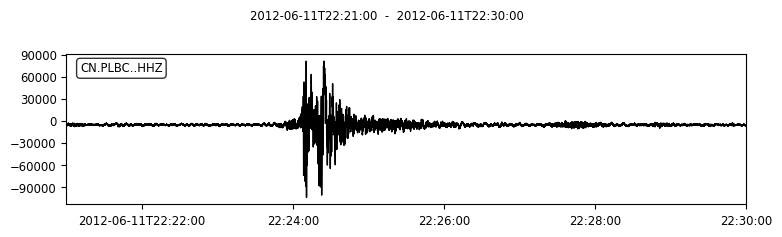

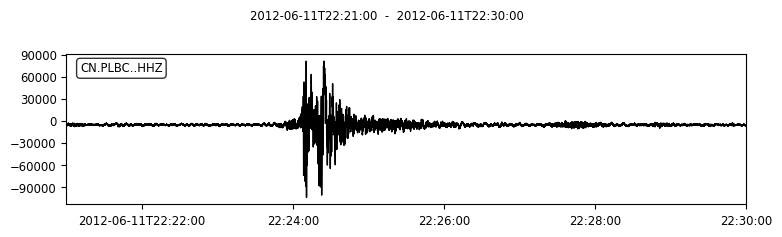

In [14]:
#绘制通道的图像
st1.plot()

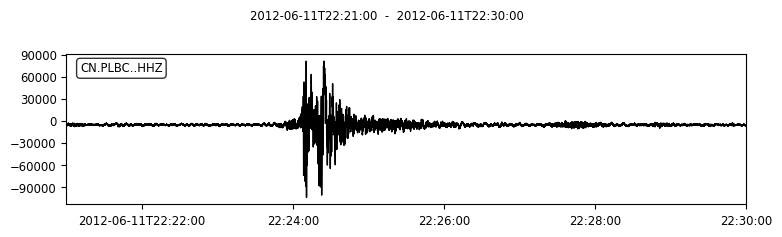

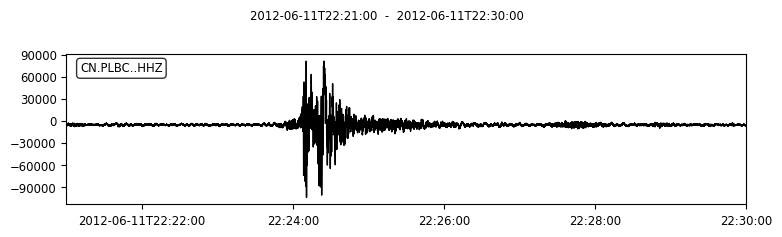

In [15]:
#绘制通道的图像
tr1.plot()

In [16]:
#重新读取通道1，此步非必要，只是为了与操作手册吻合又进行一步操作，后面几步都在此步的基础上
singlechannel =read("CN.PLBC..HHZ.SAC")

In [17]:
print(singlechannel)

1 Trace(s) in Stream:
CN.PLBC..HHZ | 2012-06-11T22:21:00.000000Z - 2012-06-11T22:30:00.000000Z | 100.0 Hz, 54001 samples


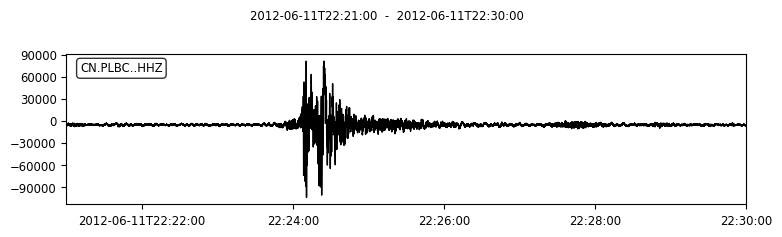

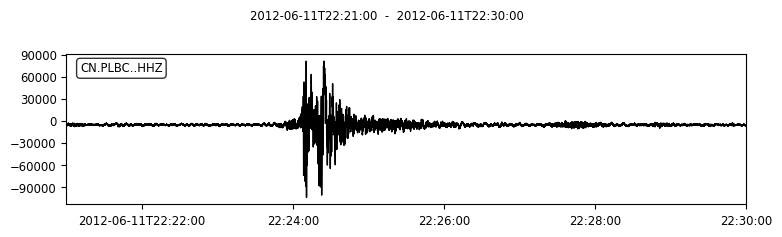

In [18]:
singlechannel.plot()

In [19]:
dt1 =singlechannel[0].stats.starttime

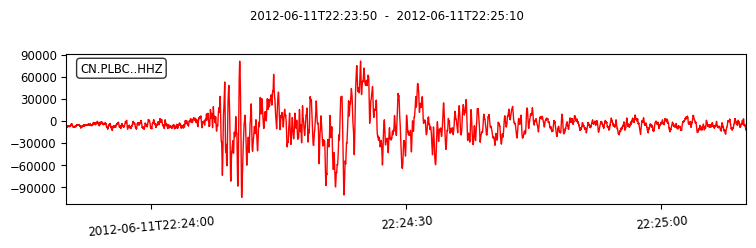

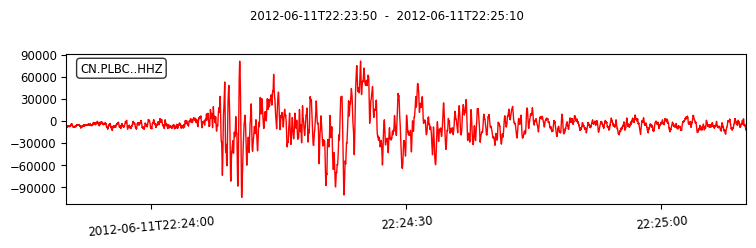

In [20]:
#得到三个通道从170s到250s的波形图
#可以通过改变starttime和endtime参数修改开始和结束时间，可以修改color参数修改图像颜色
singlechannel.plot(color='red',number_of_ticks=7,tick_rotation=5,tick_format='%I:%M %p',starttime=dt1+170,endtime=dt1+250) 

In [21]:
#得到通道从170s到250s的波形图，并将图像输出成png格式文件
singlechannel.plot(color='red',number_of_ticks=7,tick_rotation=5,tick_format='%I:%M %p',starttime=dt1+170,endtime=dt1+250,outfile='singlechannel.png')

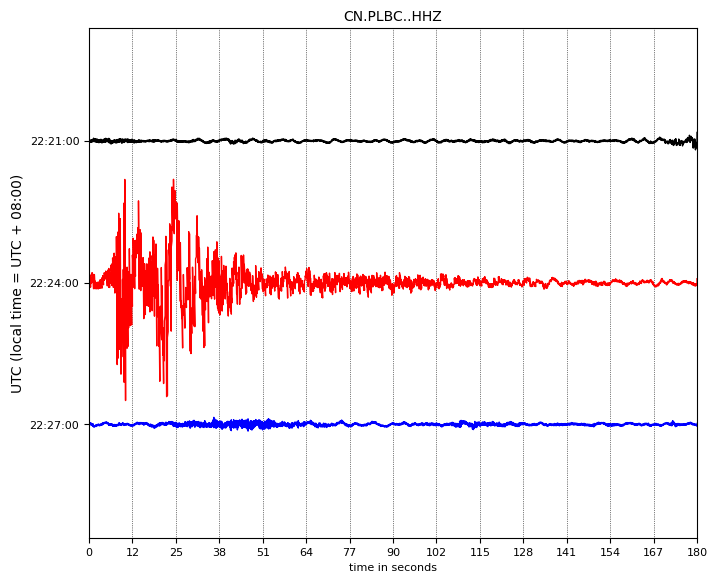

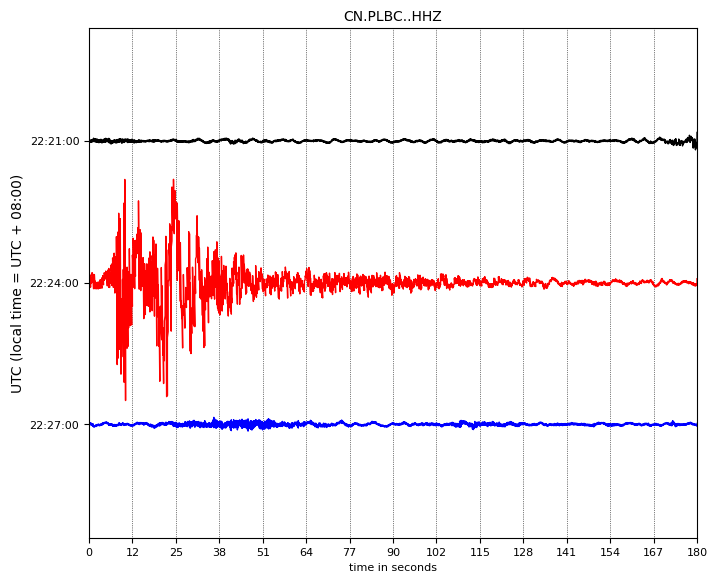

In [22]:
#分段绘制波形图，每一段间隔为3min（可通过修改interval参数修改）
singlechannel.plot(type='dayplot',interval=3,right_vertical_labels=False,one_tick_per_line=True,color=['k','r','b','g'])


# 滤波处理
使用一个零相移低通（1Hz）滤波器处理波形。

In [23]:
tr1_filt = tr1.copy()#将原始数据复制

In [24]:
tr1_filt.filter('lowpass',freq=1, corners=2, zerophase=True)#使用低通滤波

CN.PLBC..HHZ | 2012-06-11T22:21:00.000000Z - 2012-06-11T22:30:00.000000Z | 100.0 Hz, 54001 samples

In [25]:
t = np.arange(0, tr1.stats.npts / tr1.stats.sampling_rate, tr1.stats.delta)

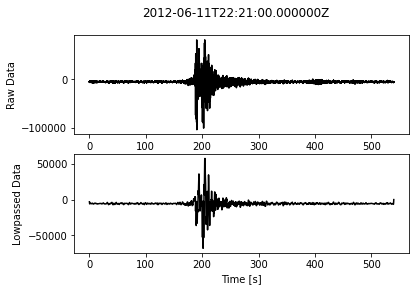

In [26]:
#绘制出原始数据和滤波数据
plt.subplot(211) 
plt.plot(t,tr1.data, 'k') 
plt.ylabel('Raw Data') 
plt.subplot(212) 
plt.plot(t,tr1_filt.data, 'k') 
plt.ylabel('Lowpassed Data') 
plt.xlabel('Time [s]')
plt.suptitle(tr1.stats.starttime) 
plt.show()

# 下采样处理

In [27]:
tr1_new = tr1.copy()#复制原数据

In [28]:
tr1_new.decimate(factor=4, strict_length=False)#以4Hz的因数提取数据

CN.PLBC..HHZ | 2012-06-11T22:21:00.000000Z - 2012-06-11T22:30:00.000000Z | 25.0 Hz, 13501 samples

In [29]:
tr1_filt = tr1.copy()

In [30]:
tr1_filt.filter('lowpass', freq=0.4 * tr1.stats.sampling_rate / 4.0)

CN.PLBC..HHZ | 2012-06-11T22:21:00.000000Z - 2012-06-11T22:30:00.000000Z | 100.0 Hz, 54001 samples

In [31]:
t1= np.arange(0, tr1.stats.npts / tr1.stats.sampling_rate, tr1.stats.delta)

In [32]:
t1_new = np.arange(0, tr1_new.stats.npts / tr1_new.stats.sampling_rate,tr1_new.stats.delta)

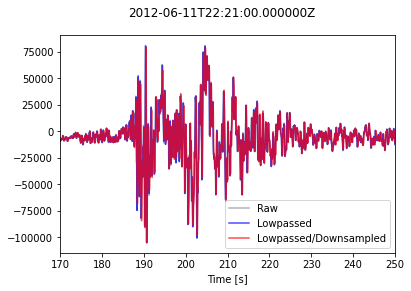

In [33]:
#绘制出170s到250s的原始数据，低通滤波数据和下采样数据
plt.plot(t1, tr1.data, 'k', label='Raw', alpha=0.3) 
plt.plot(t1, tr1_filt.data, 'b', label='Lowpassed', alpha=0.7) 
plt.plot(t1_new, tr1_new.data, 'r', label='Lowpassed/Downsampled', alpha=0.7) 
plt.xlabel('Time [s]') 
plt.xlim(170, 250) 
#plt.ylim(-200, 100)
plt.suptitle(tr1.stats.starttime) 
plt.legend() 
plt.show()

# FK分析（需进一步修正）

### 先导入一些其他的库函数

In [34]:
import matplotlib.pyplot as plt

In [35]:
import matplotlib.dates as mdates

In [36]:
from obspy.core.util import AttribDict

In [37]:
from obspy.imaging.cm import obspy_sequential

In [38]:
from obspy.signal.invsim import corn_freq_2_paz

In [39]:
from obspy.signal.array_analysis import array_processing

In [40]:
st1[0].stats.paz = AttribDict({ 'poles': [(-0.03736 - 0.03617j), (-0.03736 + 0.03617j)], 'zeros': [0j, 0j], 'sensitivity': 10000000, 'gain': 1.0})

In [41]:
st1[0].stats.coordinates = AttribDict({ 'latitude': 48.108589, 'elevation': 0.450000, 'longitude': 11.582967})#设置坐标

In [42]:
paz1hz = corn_freq_2_paz(1.0,damp=0.707) 
st1.simulate(paz_remove='self', paz_simulate=paz1hz)#仪器校正至 1Hz 转角频率

1 Trace(s) in Stream:
CN.PLBC..HHZ | 2012-06-11T22:21:00.000000Z - 2012-06-11T22:30:00.000000Z | 100.0 Hz, 54001 samples

In [43]:
#设置开始&结束时间（绝对时间）
stime = obspy.UTCDateTime("20120611222100") 
etime = obspy.UTCDateTime("20120611223000")

In [44]:
kwargs = dict(
    # slowness grid: X min, X max, Y min, Y max, Slow Step 
    sll_x=-3.0, slm_x=3.0, sll_y=-3.0, slm_y=3.0, sl_s=0.03, 
    # sliding window properties 
    win_len=1.0, win_frac=0.05, 
    # frequency properties 
    frqlow=1.0, frqhigh=8.0, prewhiten=0, 
    # restrict output 
    semb_thres=-1e8, vel_thres=-1e8, timestamp='mlabday', stime=stime, etime=etime )

In [45]:
out = array_processing(st1, **kwargs)

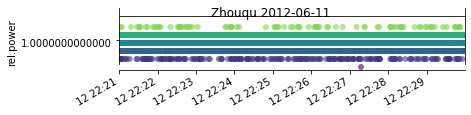

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Attempting to set identical bottom == top == 45.0 results in singular transformations; automatically expanding.
  if __name__ == '__main__':
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Attempting to set identical bottom == top == 4.242640687119285 results in singular transformations; automatically expanding.
  if __name__ == '__main__':


In [46]:
labels = ['rel.power', 'abs.power', 'baz', 'slow'] 
xlocator = mdates.AutoDateLocator() 
fig = plt.figure() 
for i, lab in enumerate(labels): 
    ax = fig.add_subplot(4, 1, i + 1) 
    ax.scatter(out[:, 0], out[:, i + 1], c=out[:, 1],alpha=0.6, edgecolors='none', cmap=obspy_sequential) 
    ax.set_ylabel(lab) 
    ax.set_xlim(out[0, 0], out[-1, 0]) 
    ax.set_ylim(out[:, i + 1].min(), out[:, i + 1].max()) 
    ax.xaxis.set_major_locator(xlocator) 
    ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(xlocator)) 
    
    fig.suptitle('Zhouqu %s' % ( stime.strftime('%Y-%m-%d'), )) #这个标题名称可以改，这里是用的舟曲做名称
    fig.autofmt_xdate() 
    fig.subplots_adjust(left=0.15, top=0.95, right=0.95, bottom=0.2, hspace=0) 
    plt.show()

## 用极坐标图表示(未完成，有问题)

In [63]:
import matplotlib.pyplot as plt
from matplotlib.colorbar import ColorbarBase
from matplotlib.colors import Normalize

In [64]:
from obspy.core.util import AttribDict
from obspy.imaging.cm import obspy_sequential
from obspy.signal.invsim import corn_freq_2_paz
from obspy.signal.array_analysis import array_processing

In [65]:
st1[0].stats.paz = AttribDict({ 'poles': [(-0.03736 - 0.03617j), (-0.03736 + 0.03617j)], 'zeros': [0j, 0j], 'sensitivity': 10000000, 'gain': 1.0})

In [66]:
paz1hz = corn_freq_2_paz(1.0,damp=0.707) 
st1.simulate(paz_remove='self', paz_simulate=paz1hz)#仪器校正至 1Hz 转角频率

1 Trace(s) in Stream:
CN.PLBC..HHZ | 2012-06-11T22:21:00.000000Z - 2012-06-11T22:30:00.000000Z | 100.0 Hz, 54001 samples

In [67]:
kwargs = dict(
    # slowness grid: X min, X max, Y min, Y max, Slow Step 
    sll_x=-3.0, slm_x=3.0, sll_y=-3.0, slm_y=3.0, sl_s=0.03, 
    # sliding window properties 
    win_len=1.0, win_frac=0.05, 
    # frequency properties 
    frqlow=1.0, frqhigh=8.0, prewhiten=0, 
    # restrict output 
    semb_thres=-1e8, vel_thres=-1e8, timestamp='mlabday', stime=stime, etime=etime )

In [68]:
out = array_processing(st1, **kwargs)

In [69]:
# Plot

In [70]:
cmap = obspy_sequential
# make output human readable, adjust backazimuth to values between 0 and 360
t, rel_power, abs_power, baz, slow = out.T
baz[baz < 0.0] += 360

In [71]:
# choose number of fractions in plot (desirably 360 degree/N is an integer!)
N = 36
N2 = 30
abins = np.arange(N + 1) * 360. / N
sbins = np.linspace(0, 3, N2 + 1)

In [72]:
# sum rel power in bins given by abins and sbins
hist, baz_edges, sl_edges = \
    np.histogram2d(baz, slow, bins=[abins, sbins],
weights=rel_power)
#

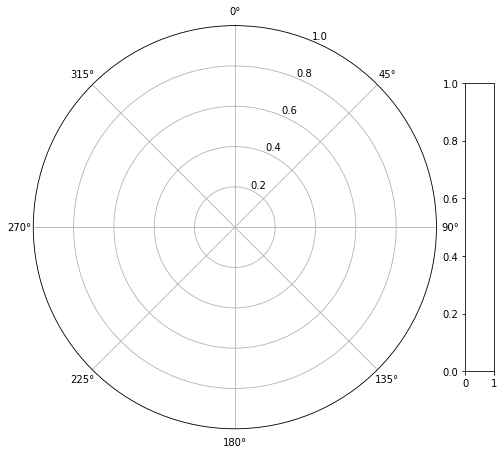

In [73]:
# transform to radian
baz_edges = np.radians(baz_edges)
# add polar and colorbar axes
fig = plt.figure(figsize=(8, 8))
cax = fig.add_axes([0.85, 0.2, 0.05, 0.5])
ax = fig.add_axes([0.10, 0.1, 0.70, 0.7], polar=True)
ax.set_theta_direction(-1)
ax.set_theta_zero_location("N")

In [74]:
dh = abs(sl_edges[1] - sl_edges[0])
dw = abs(baz_edges[1] - baz_edges[0])

In [75]:
#circle through backazimuth
for i,row in enumerate(hist):
    bars = ax.bar(left=(i * dw) * np.ones(N2),
                    height=dh * np.ones(N2),
                    width=dw, bottom=dh * np.arange(N2),
                    color=cmap(row / hist.max()))
    
ax.set_xticks(np.linspace(0, 2 * np.pi, 4, endpoint=False))
ax.set_xticklabels(['N', 'E', 'S', 'W'])

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


TypeError: bar() missing 1 required positional argument: 'x'

In [ ]:
# set slowness limits
ax.set_ylim(0, 3)
[i.set_color('grey') for i in ax.get_yticklabels()]
ColorbarBase(cax, cmap=cmap,
            norm=Normalize(vmin=hist.min(), vmax=hist.max()))
plt.show()

# 信号包络（Seismogram Envelopes）

In [47]:
import obspy.signal

In [48]:
data = st1[0].data
npts = st1[0].stats.npts

In [49]:
samprate = st1[0].stats.sampling_rate

In [50]:
# 滤波
st1_filt = st1.copy()
st1_filt.filter('bandpass', freqmin=1, freqmax=3, corners=2,zerophase=True)

1 Trace(s) in Stream:
CN.PLBC..HHZ | 2012-06-11T22:21:00.000000Z - 2012-06-11T22:30:00.000000Z | 100.0 Hz, 54001 samples

In [51]:
#滤波数据的包络线
data_envelope = obspy.signal.filter.envelope(st1_filt[0].data)

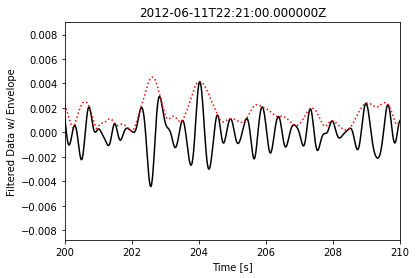

In [52]:
# The plotting, plain matplotlib
t = np.arange(0, npts / samprate, 1 / samprate)
plt.plot(t, st1_filt[0].data, 'k')
plt.plot(t, data_envelope, 'r:')
plt.title(st1[0].stats.starttime)
plt.ylabel('Filtered Data w/ Envelope')
plt.xlabel('Time [s]')
plt.xlim(200, 210)#可更改参数显示某一段数据
plt.show()

# 频谱图绘制

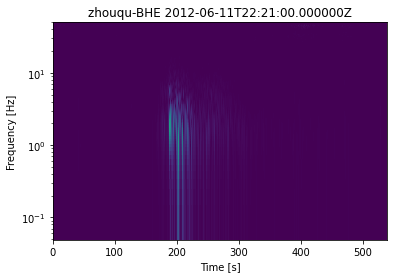

[None]

In [53]:
st1.spectrogram(log=True, title='zhouqu-BHE ' +str(st1[0].stats.starttime))#名称可以改

# 绘制典型 STA/LTA触发器

In [54]:
from obspy.signal.trigger import classic_sta_lta
help(classic_sta_lta)

Help on function classic_sta_lta in module obspy.signal.trigger:

classic_sta_lta(a, nsta, nlta)
    Computes the standard STA/LTA from a given input array a. The length of
    the STA is given by nsta in samples, respectively is the length of the
    LTA given by nlta in samples.
    
    Fast version written in C.
    
    :type a: NumPy :class:`~numpy.ndarray`
    :param a: Seismic Trace
    :type nsta: int
    :param nsta: Length of short time average window in samples
    :type nlta: int
    :param nlta: Length of long time average window in samples
    :rtype: NumPy :class:`~numpy.ndarray`
    :return: Characteristic function of classic STA/LTA



In [55]:
from obspy.core import read 
from obspy.signal.trigger import plot_trigger

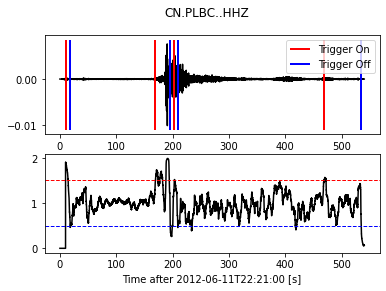

In [56]:
df = tr1.stats.sampling_rate
cft = classic_sta_lta(tr1.data, int(5 * df), int(10 * df)) 
plot_trigger(tr1, cft, 1.5, 0.5)

# Z探测

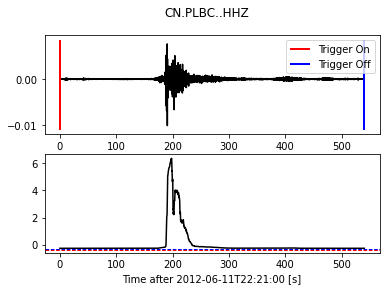

In [57]:
from obspy.signal.trigger import z_detect 
cft = z_detect(tr1.data, int(10 * df)) 
plot_trigger(tr1, cft, -0.4, -0.3)

# 后面是一些图像操作没有实质性用处

In [7]:
 dt =singlechannel[0].stats.starttime
    

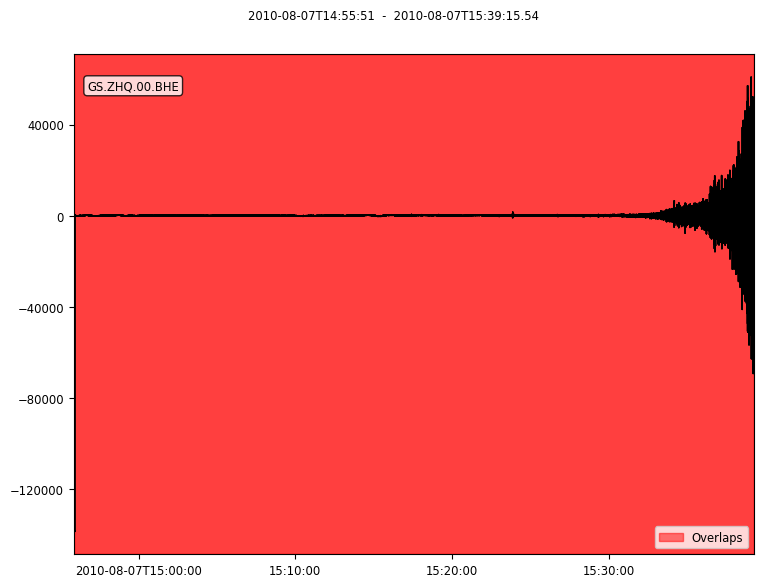

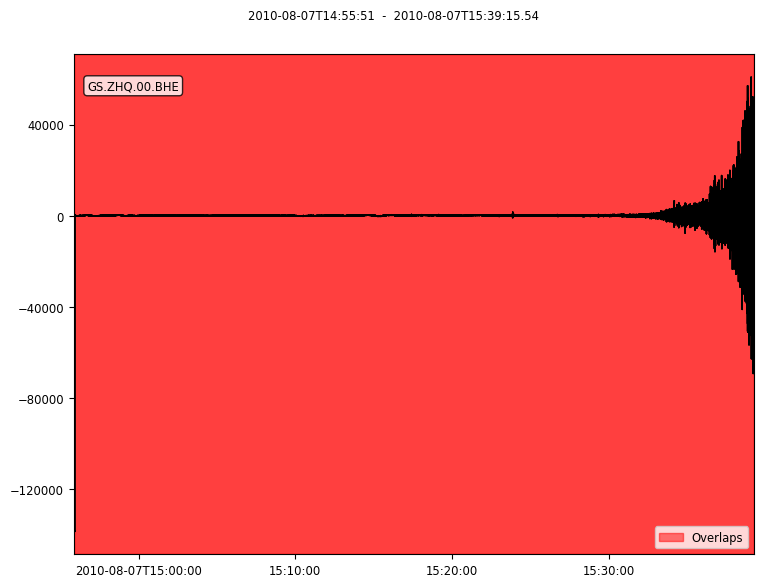

In [8]:
threechannels.plot(size=(800, 600))

In [9]:
singlechannel =read("GS.ZHQ.00.BHN.SAC")

In [10]:
print(singlechannel)

1 Trace(s) in Stream:
GS.ZHQ.00.BHN | 2010-08-07T14:55:51.000000Z - 2010-08-07T15:39:19.560000Z | 100.0 Hz, 260857 samples


In [11]:
threechannels =read("GS.ZHQ.00.BHN.SAC")
threechannels +=read("GS.ZHQ.00.BHN.SAC")
threechannels +=read("GS.ZHQ.00.BHN.SAC")
print(threechannels)

3 Trace(s) in Stream:
GS.ZHQ.00.BHN | 2010-08-07T14:55:51.000000Z - 2010-08-07T15:39:19.560000Z | 100.0 Hz, 260857 samples
GS.ZHQ.00.BHN | 2010-08-07T14:55:51.000000Z - 2010-08-07T15:39:19.560000Z | 100.0 Hz, 260857 samples
GS.ZHQ.00.BHN | 2010-08-07T14:55:51.000000Z - 2010-08-07T15:39:19.560000Z | 100.0 Hz, 260857 samples


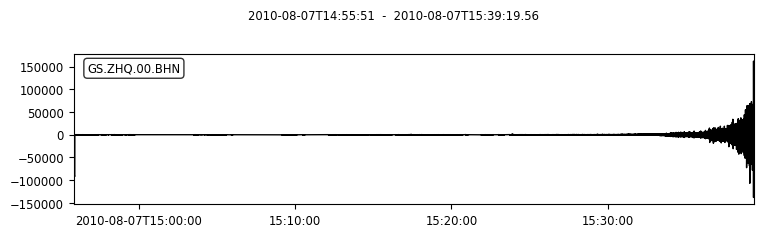

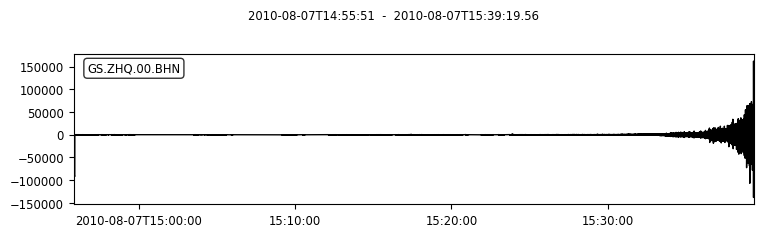

In [12]:
singlechannel.plot()

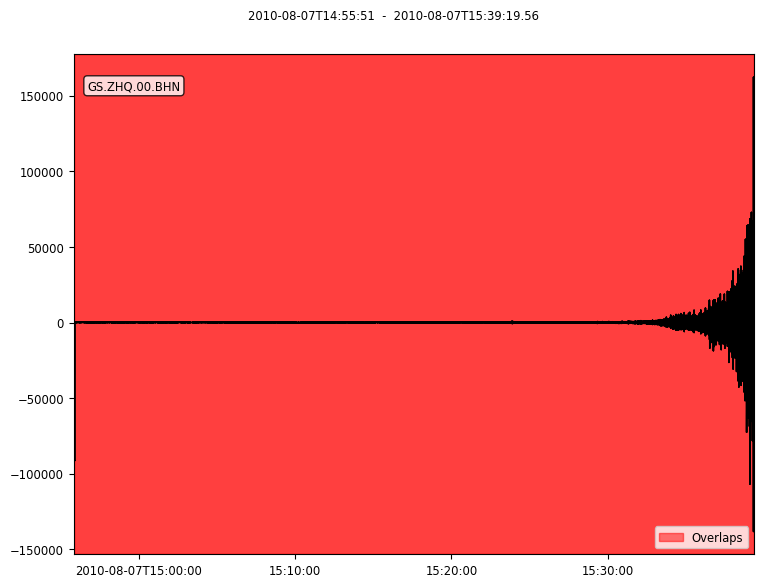

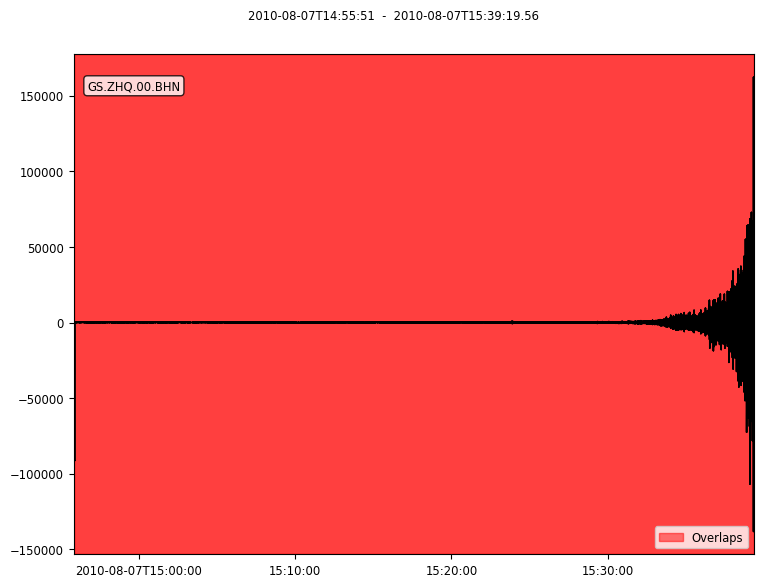

In [13]:
threechannels.plot(size=(800, 600))

In [14]:
singlechannel =read("GS.ZHQ.00.BHZ.SAC")

In [15]:
print(singlechannel)

1 Trace(s) in Stream:
GS.ZHQ.00.BHZ | 2010-08-07T14:55:51.000000Z - 2010-08-07T15:39:19.600000Z | 100.0 Hz, 260861 samples


In [16]:
threechannels =read("GS.ZHQ.00.BHZ.SAC")
threechannels +=read("GS.ZHQ.00.BHZ.SAC")
threechannels +=read("GS.ZHQ.00.BHZ.SAC")
print(threechannels)

3 Trace(s) in Stream:
GS.ZHQ.00.BHZ | 2010-08-07T14:55:51.000000Z - 2010-08-07T15:39:19.600000Z | 100.0 Hz, 260861 samples
GS.ZHQ.00.BHZ | 2010-08-07T14:55:51.000000Z - 2010-08-07T15:39:19.600000Z | 100.0 Hz, 260861 samples
GS.ZHQ.00.BHZ | 2010-08-07T14:55:51.000000Z - 2010-08-07T15:39:19.600000Z | 100.0 Hz, 260861 samples


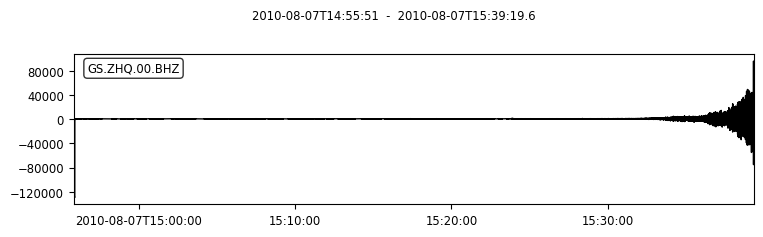

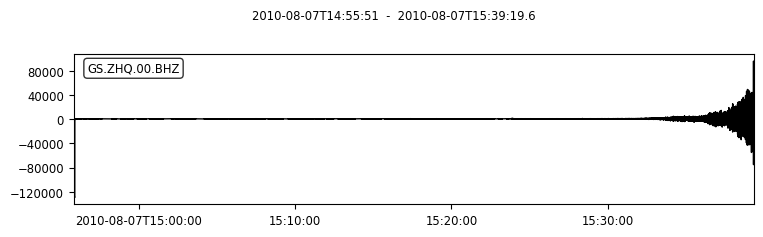

In [17]:
singlechannel.plot()

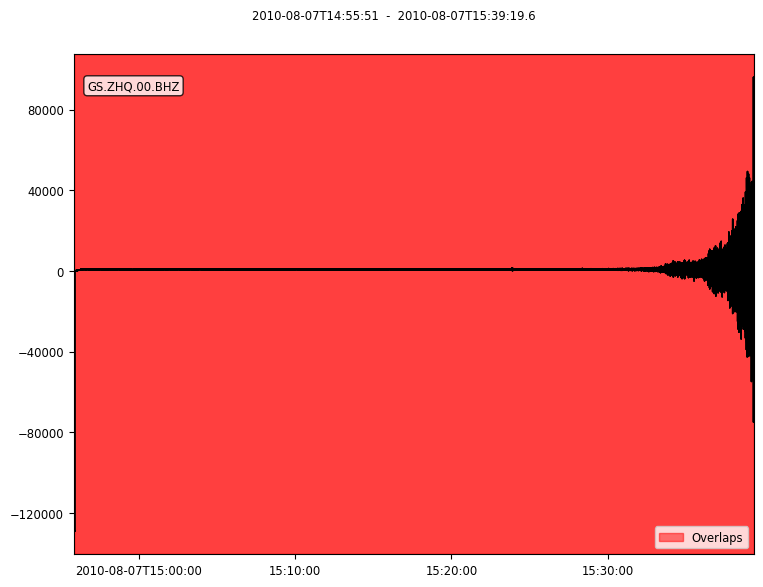

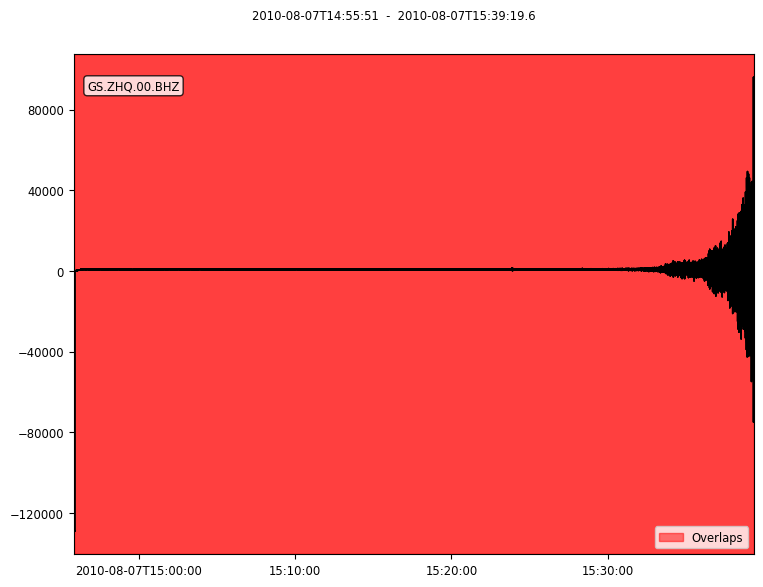

In [18]:
threechannels.plot(size=(800, 600))